# 🔥 **Análise Exploratória de Dados (EDA) - LighterTracker**

## Estrutura do Notebook

Este notebook realiza uma análise exploratória dos dados sintéticos gerados para o LighterTracker,
um sistema de rastreamento de isqueiros.

O objetivo é entender o perfil dos usuários, a popularidade
dos isqueiros, os padrões de utilização e a distribuição geográfica, fornecendo insights acionáveis
para o negócio.


1. Configuração Inicial e Carregamento dos Dados
2. Análise Exploratória
   - 2.1: Perfil de Usuários e Hábitos de Compra
   - 2.2: Popularidade e Características de Isqueiros
   - 2.3: Utilização e Ciclo de Vida do Isqueiro
   - 2.4: Análise de Dados Geográficos
3. Conclusões e Próximos Passos


# 1.Configuração Inicial e Carregamento dos Dados


In [1]:
# Objetivo: Preparar o ambiente, carregar as tabelas do LighterTracker e realizar uma inspeção inicial.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [14]:
# Objetivo: Preparar o ambiente, carregar as tabelas do LighterTracker e realizar uma inspeção inicial.
plt.style.use('seaborn-v0_8')
sns.set_palette('deep')
pd.set_option('display.max_columns', 100)

# Definir diretório dos dados
data_dir = '/content/drive/MyDrive/lightertrack'

# Lista de arquivos CSV
csv_files = [
    'estados.csv', 'cidades.csv', 'usuarios.csv', 'marcas.csv', 'categorias_isqueiros.csv',
    'isqueiros.csv', 'tipos_estabelecimento.csv', 'estabelecimentos.csv', 'compras.csv',
    'itens_compra.csv', 'isqueiros_usuario.csv', 'locais.csv', 'utilizacao.csv',
    'historico_localizacao.csv', 'manutencao.csv'
]

# Dicionário para armazenar os DataFrames
dfs = {}

# ### Tratamento de Colunas de Data
# Identificar e converter colunas de data/hora para o tipo datetime
date_columns = {
    'estados': ['DataCriacao', 'DataAtualizacao'],
    'cidades': ['DataCriacao'],
    'usuarios': ['DataNascimento', 'DataCadastro', 'DataUltimaAtualizacao'],
    'marcas': ['DataFundacao', 'DataCriacao'],
    'categorias_isqueiros': ['DataCriacao'],
    'isqueiros': ['DataLancamento', 'DataCriacao'],
    'tipos_estabelecimento': ['DataCriacao'],
    'estabelecimentos': ['DataAbertura', 'DataCriacao'],
    'compras': ['DataCompra', 'DataCriacao'],
    'itens_compra': ['DataCriacao'],
    'isqueiros_usuario': ['DataCompra', 'DataPrimeiroUso', 'DataUltimaLocalizacao', 'DataCriacao', 'DataAtualizacao'],
    'locais': ['DataCriacao'],
    'utilizacao': ['DataHoraUso', 'DataCriacao'],
    'historico_localizacao': ['DataHoraRegistro', 'DataCriacao'],
    'manutencao': ['DataManutencao', 'DataCriacao']
}

# 2. Análise Exploratória (EDA)


##2.1: Análise de Perfil de Usuários e Hábitos de Compra
Objetivo: Entender as características demográficas dos usuários e seus hábitos de compra.


In [75]:
# Objetivo: Entender as características demográficas dos usuários e seus hábitos de compra.

# --- Data Loading (Included for self-contained execution) ---
# Define data directory
data_dir = '/content/drive/MyDrive/lightertrack'

# List of CSV files
csv_files = [
    'estados.csv', 'cidades.csv', 'usuarios.csv', 'compras.csv' # Include only necessary files for this section
]

# Dictionary to store DataFrames
dfs = {}

# Load each CSV file
for file in csv_files:
    df_name = file.replace('.csv', '')
    dfs[df_name] = pd.read_csv(data_dir + '/' + file)

# Identify and convert date/time columns to datetime type
date_columns = {
    'usuarios': ['DataNascimento', 'DataCadastro', 'DataUltimaAtualizacao'],
    'compras': ['DataCompra'],
    'cidades': ['DataCriacao'],
    'estados': ['DataCriacao', 'DataAtualizacao']
}

for df_name, cols in date_columns.items():
    if df_name in dfs: # Check if df exists in dfs
        for col in cols:
            if col in dfs[df_name].columns: # Check if column exists in df
                dfs[df_name][col] = pd.to_datetime(dfs[df_name][col], errors='coerce') # Use errors='coerce' for robustness
    # else:
        # print(f"Warning: DataFrame '{df_name}' not loaded. Skipping date conversion.")


# --- Data Preparation for User Profile and Purchase Habits Analysis ---
# Merge tables: estados -> cidades -> usuarios -> compras
df_perfil = dfs['usuarios'].merge(
    dfs['cidades'][['CidadeID', 'NomeCidade', 'EstadoID', 'Populacao']], on='CidadeID'
).merge(
    dfs['estados'][['EstadoID', 'NomeEstado', 'Regiao']], on='EstadoID'
).merge(
    dfs['compras'][['CompraID', 'UsuarioID', 'DataCompra', 'ValorTotal', 'MetodoPagamento']], on='UsuarioID', how='left'
)

# Idade Derivada
df_perfil['Idade'] = (datetime.now() - df_perfil['DataNascimento']).dt.days // 365

# Map Fumante to 'Sim'/'Não'
df_perfil['Fumante_Label'] = df_perfil['Fumante'].map({0: 'Não', 1: 'Sim'})

# Create FaixaRenda
bins = [0, 1000, 3000, 5000, 10000, float('inf')]
labels = ['<1k', '1k-3k', '3k-5k', '5k-10k', '>10k']
df_perfil['FaixaRenda'] = pd.cut(df_perfil['RendaFamiliar'], bins=bins, labels=labels, right=False)



O Gemini(IA) definiu algumas variáveis por critério, então optei por continuar com elas no código, como o valor da Idade, Fumante e Faixa de Renda.

In [76]:
# O Dataframe para análise do Perfil de Usuários e Hábitos de Compra ficou assim:
display(df_perfil.head())

,UsuarioID,Nome,Email,Telefone,DataNascimento,Genero,CidadeID,CEP,Profissao,RendaFamiliar,Fumante,DataCadastro,DataUltimaAtualizacao,Ativo,NomeCidade,EstadoID,Populacao,NomeEstado,Regiao,CompraID,DataCompra,ValorTotal,MetodoPagamento,Idade,Fumante_Label,FaixaRenda
0,1,Gabrielly Azevedo,heloisa62@example.com,(081) 8790 5073,2002-04-10,F,330,66206324,Portuário,1991.88,0,2024-02-14 09:18:27.323997,2025-04-02 08:20:33.950547,1,Novais,4,2540179,Rio Grande do Sul,Sul,2065.0,2025-07-17 05:04:55.830206,0.000000,Cartão Crédito,23,Não,1k-3k
1,1,Gabrielly Azevedo,heloisa62@example.com,(081) 8790 5073,2002-04-10,F,330,66206324,Portuário,1991.88,0,2024-02-14 09:18:27.323997,2025-04-02 08:20:33.950547,1,Novais,4,2540179,Rio Grande do Sul,Sul,5905.0,2023-08-28 12:06:49.171735,165.306394,Dinheiro,23,Não,1k-3k
2,1,Gabrielly Azevedo,heloisa62@example.com,(081) 8790 5073,2002-04-10,F,330,66206324,Portuário,1991.88,0,2024-02-14 09:18:27.323997,2025-04-02 08:20:33.950547,1,Novais,4,2540179,Rio Grande do Sul,Sul,10876.0,2025-02-08 15:33:10.122361,49.591081,PIX,23,Não,1k-3k
3,1,Gabrielly Azevedo,heloisa62@example.com,(081) 8790 5073,2002-04-10,F,330,66206324,Portuário,1991.88,0,2024-02-14 09:18:27.323997,2025-04-02 08:20:33.950547,1,Novais,4,2540179,Rio Grande do Sul,Sul,13859.0,2023-07-31 14:54:15.589757,56.464412,PIX,23,Não,1k-3k
4,1,Gabrielly Azevedo,heloisa62@example.com,(081) 8790 5073,2002-04-10,F,330,66206324,Portuário,1991.88,0,2024-02-14 09:18:27.323997,2025-04-02 08:20:33.950547,1,Novais,4,2540179,Rio Grande do Sul,Sul,25425.0,2024-12-02 18:51:21.985888,277.851549,PIX,23,Não,1k-3k


In [80]:
# Remove duplicate rows
df_perfil.drop_duplicates(inplace=True)
print("Linhas Duplicadas Removidas")

Linhas Duplicadas Removidas


In [81]:
# Excluindo as colunas que não preciso. O Gemini me ajudou a excluir essas aqui:
columns_to_drop = ['CEP', 'Telefone', 'DataCadastro', 'DataUltimaAtualizacao', 'Ativo']
df_perfil = df_perfil.drop(columns=columns_to_drop, errors='ignore') # Use errors='ignore' in case a column doesn't exist
print(f"Dropped columns: {columns_to_drop}")


Dropped columns: ['CEP', 'Telefone', 'DataCadastro', 'DataUltimaAtualizacao', 'Ativo']


### Distribuição de Usuários por Gênero
os dados gerados sintéticamente criaram por algum motivo linhas com o dado 'o' portanto ele aparece no gráfico de gênero.*texto em itálico*

In [83]:
import plotly.express as px

# Criar o gráfico
fig = px.histogram(df_perfil, x='Genero', color='Genero',
                   title='Distribuição de Usuários por Gênero',
                   labels={'Genero': 'Gênero'},
                   category_orders={'Genero': df_perfil['Genero'].value_counts().index},
                   color_discrete_sequence=px.colors.qualitative.Set3)

# Ajustes de layout
fig.update_layout(xaxis_title='Gênero',
                  yaxis_title='Contagem de Usuários',
                  bargap=0.2)

fig.show()

Visualização clara do volume de usuários por cada identidade de gênero cadastrada.

Pode ajudar a entender o perfil predominante e direcionar estratégias mais inclusivas, se for o caso.

**O Genero Masculino e Feminino estão dividos de forma igual, enquanto 'o' representa um dado desconhecido**

### Distribuição por Renda Familiar

In [84]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde

# Dados
renda = df_perfil['RendaFamiliar'].dropna()

# Histograma
hist_data = np.histogram(renda, bins=30)
x_hist = hist_data[1]
y_hist = hist_data[0]

# Estimativa de densidade
kde = gaussian_kde(renda)
x_kde = np.linspace(renda.min(), renda.max(), 500)
y_kde = kde(x_kde)

# Gráfico com Plotly
fig = go.Figure()

fig.add_trace(go.Bar(x=x_hist[:-1], y=y_hist,
                     marker_color='skyblue',
                     name='Histograma'))

fig.add_trace(go.Scatter(x=x_kde, y=y_kde * len(renda) * (x_hist[1] - x_hist[0]),
                         mode='lines',
                         line=dict(color='darkblue'),
                         name='KDE'))

fig.update_layout(title='Distribuição da Renda Familiar',
                  xaxis_title='Renda Familiar',
                  yaxis_title='Frequência',
                  bargap=0.2,
                  template='plotly_white')

fig.show()


**Entender a dispersão dos dados**: Ele mostra se a maioria dos usuários tem renda concentrada em faixas específicas — por exemplo, se há muitos com até R$ 2.000 ou se a base é mais distribuída.

**Guiar ações de negócio**:

*Segmentação de campanhas*: Ofertas podem ser ajustadas para faixas com maior poder aquisitivo.

*Inclusão digital*: Faixas mais baixas podem indicar públicos vulneráveis ou de alto potencial social.

### Faixa de Renda dos Usuários

In [100]:
import plotly.express as px

fig = px.histogram(df_perfil, x='FaixaRenda', color='Fumante_Label',
                   barmode='group',
                   title='Distribuição de Fumantes por Faixa de Renda',
                   labels={'FaixaRenda': 'Faixa de Renda', 'Fumante_Label': 'Fumante'},
                   category_orders={'FaixaRenda': df_perfil['FaixaRenda'].value_counts().index},
                   color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(xaxis_title='Faixa de Renda',
                  yaxis_title='Quantidade de Usuários',
                  bargap=0.15)

fig.show()


Compara fumantes vs. não-fumantes em cada **faixa de renda**: ideal pra detectar padrões comportamentais e de consumo.

Pode indicar se fumar é mais comum em determinadas classes sociais — útil pra campanhas de saúde, precificação ou comunicação.

**Interatividade na visualização**: facilita apresentações e permite análises mais ricas com hover.

### Cidades com Mais Usuários

/tmp/ipython-input-1273461457.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




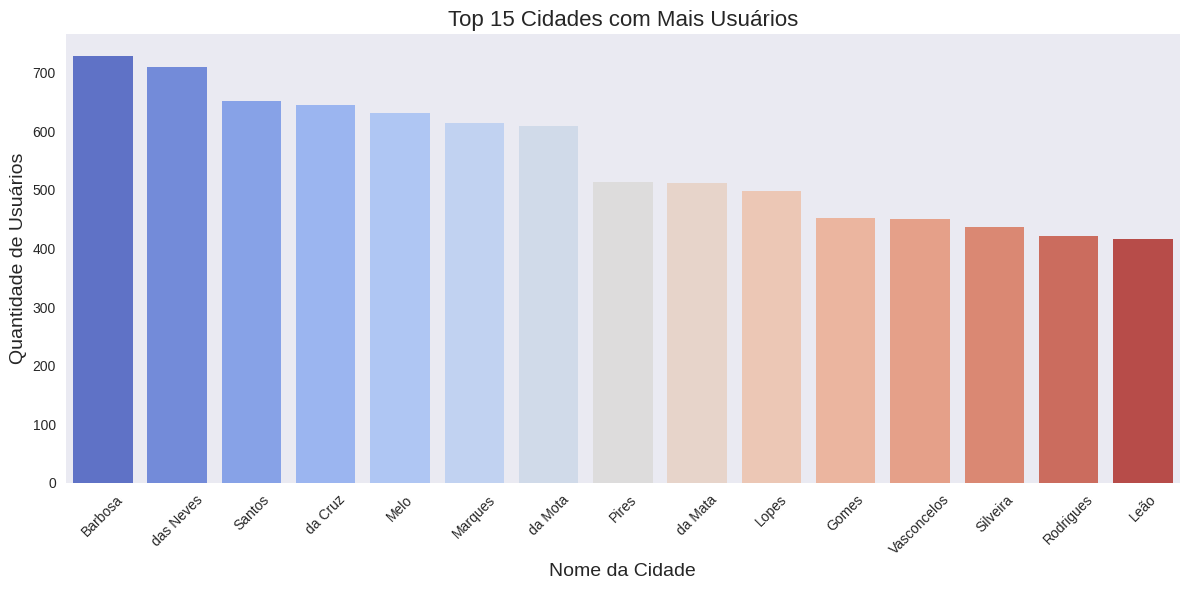

In [93]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_perfil, x='NomeCidade',
              order=df_perfil['NomeCidade'].value_counts().index[:15],
              palette='coolwarm')

# Títulos e rótulos
plt.title('Top 15 Cidades com Mais Usuários', fontsize=16)
plt.xlabel('Nome da Cidade', fontsize=14)
plt.ylabel('Quantidade de Usuários', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Identificação de polos**: Aponta onde o app LighterTracker tem maior adesão.

**Ações regionais**: Excelente pra pensar em campanhas locais, parcerias comerciais ou eventos em cidades estratégicas.

**Expansão inteligente**: As cidades fora do top 15 podem ser observadas em análises futuras pra entender oportunidades de crescimento.

### Distribuição de Usuários por Estado

/tmp/ipython-input-2475769188.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




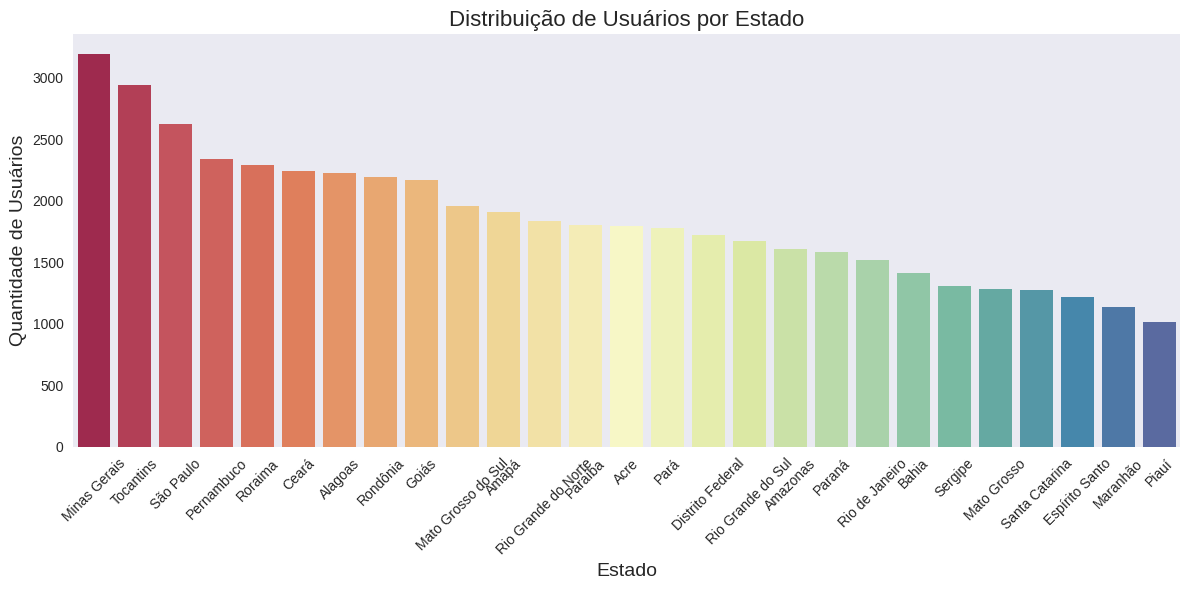

In [95]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_perfil, x='NomeEstado',
              order=df_perfil['NomeEstado'].value_counts().index,
              palette='Spectral')

# Ajustes estéticos
plt.title('Distribuição de Usuários por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Quantidade de Usuários', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Permite hover sobre cada barra pra ver os valores precisos.

Ajuda a destacar Estados com alta concentração de usuários, com mais clareza.

### Distribuição de Usuários por Região

In [97]:
import plotly.express as px

# Contagem por região
regiao_counts = df_perfil['Regiao'].value_counts().reset_index()
regiao_counts.columns = ['Regiao', 'Quantidade']

fig = px.bar(regiao_counts, x='Regiao', y='Quantidade',
             title='Distribuição de Usuários por Região',
             labels={'Regiao': 'Região', 'Quantidade': 'Quantidade de Usuários'},
             color='Regiao',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(xaxis_title='Região',
                  yaxis_title='Quantidade de Usuários',
                  xaxis={'categoryorder': 'total descending'},
                  bargap=0.2)

fig.show()


Analisa a Distribuição de Usuários por Região. Nas regiões Norte e Nordeste há uma maior concetração de uso.

Idela verificarmos se há correlação entre a faixa etária nos estados do Nordeste e Norte tem alguma relação.

### Distribuição por Método de Pagamento

In [99]:
import plotly.express as px

# Agrupando por método de pagamento
pagamento_counts = df_perfil['MetodoPagamento'].value_counts().reset_index()
pagamento_counts.columns = ['MetodoPagamento', 'Quantidade']

fig = px.bar(pagamento_counts, x='MetodoPagamento', y='Quantidade',
             title='Distribuição dos Métodos de Pagamento',
             labels={'MetodoPagamento': 'Método de Pagamento', 'Quantidade': 'Quantidade de Usuários'},
             color='MetodoPagamento',
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(xaxis_title='Método de Pagamento',
                  yaxis_title='Quantidade de Usuários',
                  xaxis={'categoryorder': 'total descending'},
                  bargap=0.25)

fig.show()


**Interatividade**: Com hover você explora cada método com facilidade — ótimo pra entender a dominância de boleto, cartão ou Pix.

**Insights estratégicos**: Saber os métodos preferidos pode orientar desde campanhas promocionais até melhorias no UX do app.

# 2.2: Análise de Popularidade e Características de Isqueiros


In [109]:
# Merge das tabelas: marcas -> isqueiros -> itens_compra <- categorias

# --- Data Loading (Included for self-contained execution) ---
# Define data directory
data_dir = '/content/drive/MyDrive/lightertrack'

# List of CSV files needed for this section
csv_files_pop_isqueiros = [
    'itens_compra.csv', 'isqueiros.csv', 'marcas.csv', 'categorias_isqueiros.csv'
]

# Dictionary to store DataFrames
dfs = {}

# Load each CSV file needed
for file in csv_files_pop_isqueiros:
    df_name = file.replace('.csv', '')
    # Check if the dataframe already exists in dfs to avoid redundant loading if other sections were run
    if df_name not in dfs:
        dfs[df_name] = pd.read_csv(data_dir + '/' + file)
        print(f"Loaded {file}")
    else:
        print(f"{file} already loaded.")


# --- Original Analysis Code ---
df_pop_isqueiros = dfs['itens_compra'].merge(
    dfs['isqueiros'][['IsqueiroID', 'MarcaID', 'CategoriaID', 'Modelo', 'Cor', 'Material', 'TipoCombustivel', 'CapacidadeML', 'Peso', 'PrecoSugerido']], on='IsqueiroID'
).merge(
    dfs['marcas'][['MarcaID', 'NomeMarca']], on='MarcaID'
).merge(
    dfs['categorias_isqueiros'][['CategoriaID', 'NomeCategoria']], on='CategoriaID'
)

# Drop the DataCriacao column as it's less relevant for popularity/characteristics analysis
columns_to_drop_pop_isqueiros = ['DataCriacao']
df_pop_isqueiros = df_pop_isqueiros.drop(columns=columns_to_drop_pop_isqueiros, errors='ignore')
print(f"Dropped columns from df_pop_isqueiros: {columns_to_drop_pop_isqueiros}")


# Display the head of the merged dataframe
display(df_pop_isqueiros.head())

Loaded itens_compra.csv
Loaded isqueiros.csv
Loaded marcas.csv
Loaded categorias_isqueiros.csv
Dropped columns from df_pop_isqueiros: ['DataCriacao']


,ItemCompraID,CompraID,IsqueiroID,Quantidade,PrecoUnitario,Desconto,SubTotal,MarcaID,CategoriaID,Modelo,Cor,Material,TipoCombustivel,CapacidadeML,Peso,PrecoSugerido,NomeMarca,NomeCategoria
0,1,42562,64,1,66.21,16.30,55.417770,5,5,Modelo 64,Azul violeta,Aço Inoxidável,Butano,6.23,74.82,48.02,Djeep,Industrial
1,2,28348,60,2,21.34,17.83,35.070156,6,2,Modelo 60,Marrom rosado,Plástico,Butano,34.78,10.13,67.16,Flamme,Recarregável
2,3,46261,26,2,54.01,12.36,94.668728,5,4,Modelo 26,Coral claro,Aço Inoxidável,Gasolina,47.81,51.28,99.84,Djeep,Decorativo
3,4,14754,15,2,97.28,9.01,177.030144,9,1,Modelo 15,Carmim carnáceo,Aço Inoxidável,Butano,12.87,49.10,11.03,Firebird,Descartável
4,5,24538,14,1,18.53,11.79,16.345313,11,1,Modelo 14,Cinza claro,Aço Inoxidável,Butano,12.60,73.46,86.36,Ignite,Descartável


### Top 10 Marcas de Isqueiro por Quantidade Vendida

/tmp/ipython-input-3824497306.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




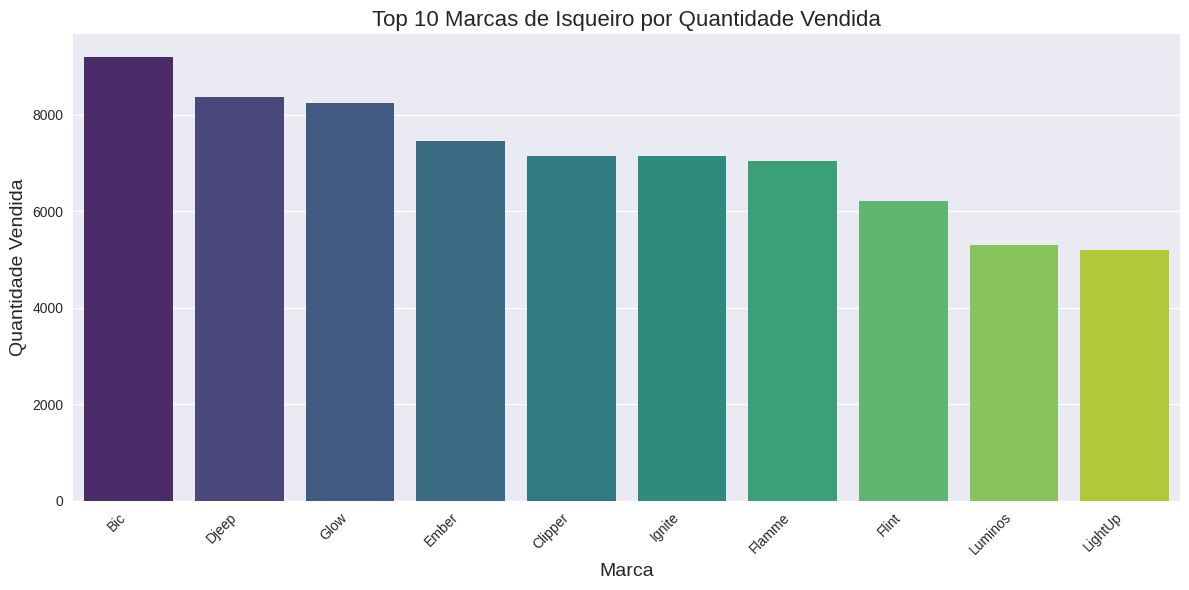

In [122]:
# Calculate quantity sold per brand from df_pop_isqueiros
brand_counts = df_pop_isqueiros.groupby('NomeMarca')['Quantidade'].sum().reset_index()

# Get the top 10 brands
top_10_brands = brand_counts.sort_values('Quantidade', ascending=False).head(10)

# Create a bar chart for the top 10 brands
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_brands, x='NomeMarca', y='Quantidade', palette='viridis')
plt.title('Top 10 Marcas de Isqueiro por Quantidade Vendida', fontsize=16)
plt.xlabel('Marca', fontsize=14)
plt.ylabel('Quantidade Vendida', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Distribuição de Isqueiros por Tipo de Combustível

/tmp/ipython-input-1413161259.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




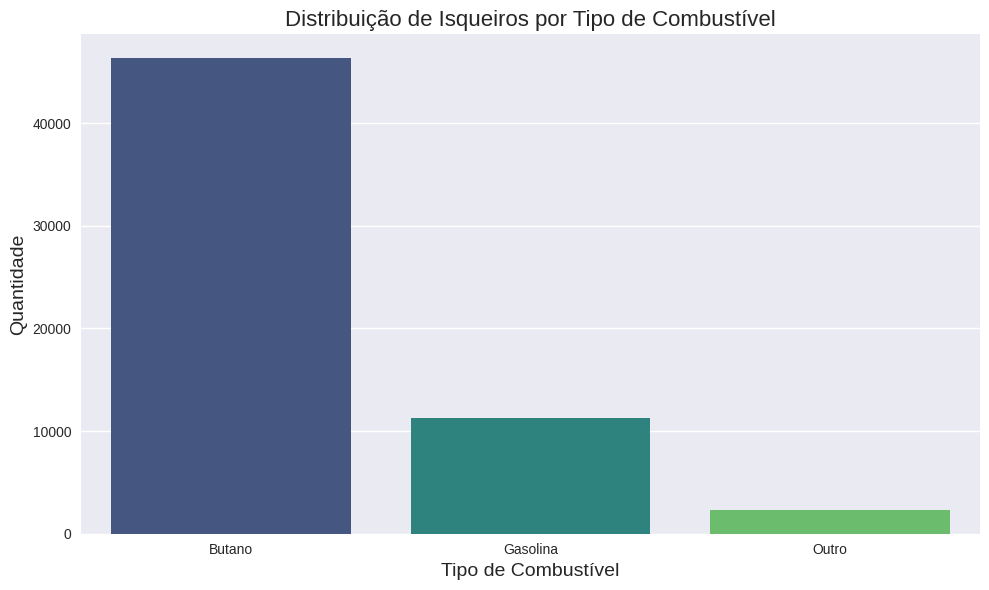

In [124]:
# Calculate the distribution of TipoCombustivel
combustivel_counts = df_pop_isqueiros['TipoCombustivel'].value_counts().reset_index()
combustivel_counts.columns = ['TipoCombustivel', 'Quantidade']

# Create a bar chart for the distribution of TipoCombustivel
plt.figure(figsize=(10, 6))
sns.barplot(data=combustivel_counts, x='TipoCombustivel', y='Quantidade', palette='viridis')
plt.title('Distribuição de Isqueiros por Tipo de Combustível', fontsize=16)
plt.xlabel('Tipo de Combustível', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
plt.tight_layout()
plt.show()

### Quantidade Vendida de Marcas dividida por Gênero


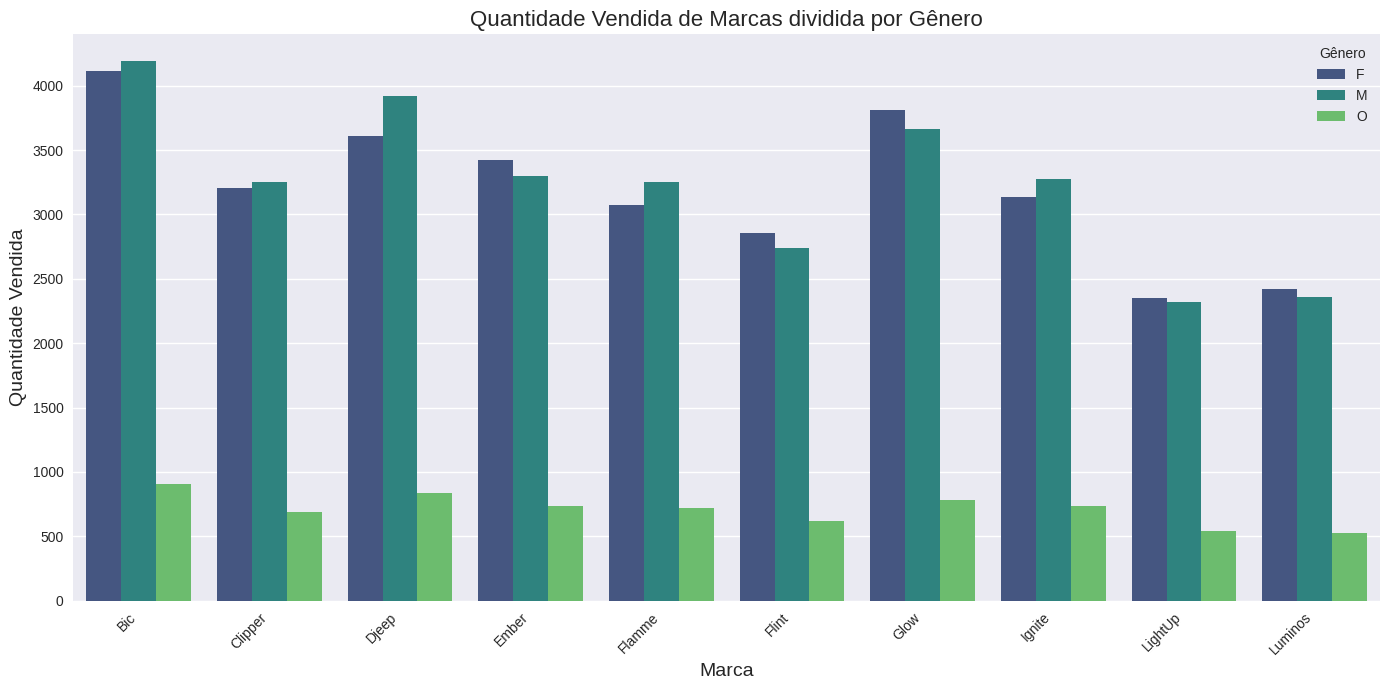

In [128]:
# Analyze brand preference by gender

# Merge df_pop_isqueiros with df_perfil on CompraID to link purchases to user gender
df_brand_gender = df_pop_isqueiros.merge(
    df_perfil[['CompraID', 'Genero']], on='CompraID', how='left'
)

# Calculate quantity sold per brand and gender
brand_gender_counts = df_brand_gender.groupby(['NomeMarca', 'Genero'])['Quantidade'].sum().reset_index()

# Filter for the top overall brands to keep the plot manageable
top_brands_list = top_10_brands['NomeMarca'].tolist()
brand_gender_counts_top = brand_gender_counts[brand_gender_counts['NomeMarca'].isin(top_brands_list)]

# Create a grouped bar chart for brand preference by gender for top brands
plt.figure(figsize=(14, 7))
sns.barplot(data=brand_gender_counts_top, x='NomeMarca', y='Quantidade', hue='Genero', palette='viridis')
plt.title('Quantidade Vendida de Marcas dividida por Gênero', fontsize=16)
plt.xlabel('Marca', fontsize=14)
plt.ylabel('Quantidade Vendida', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()

### Top 15 Cores de Isqueiro por Quantidade Vendida

/tmp/ipython-input-1400477279.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




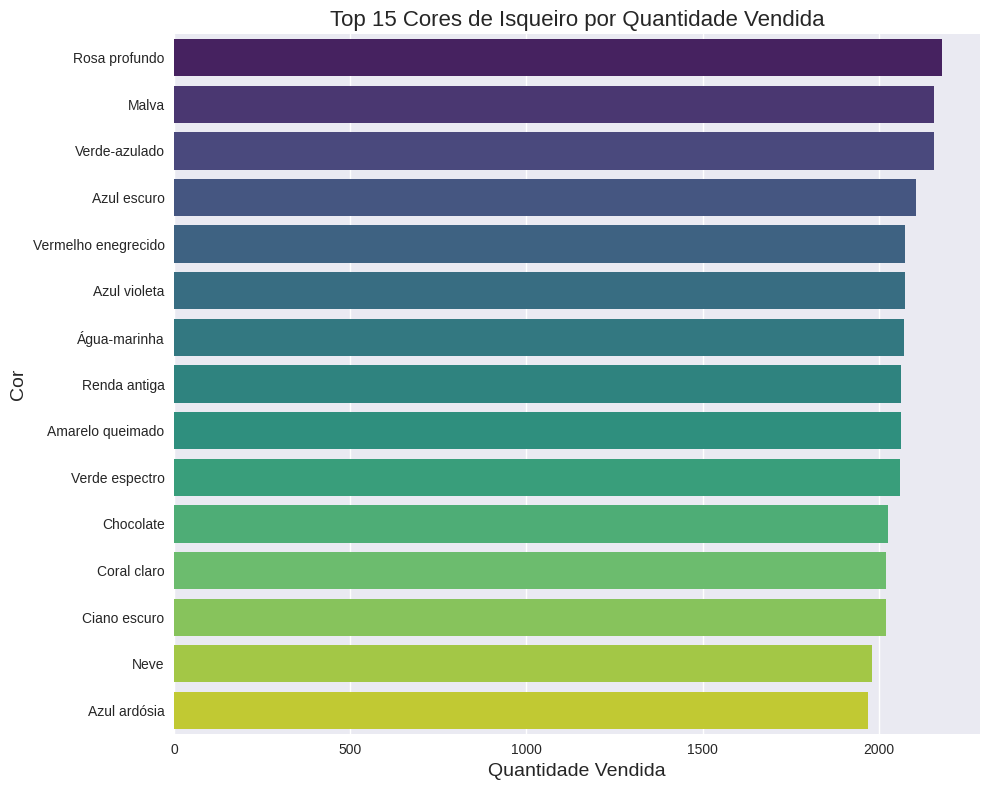

In [125]:
# Calculate quantity sold per color
color_counts = df_pop_isqueiros.groupby('Cor')['Quantidade'].sum().reset_index()

# Get the top N colors (let's show top 15 for potentially more variety)
top_colors = color_counts.sort_values('Quantidade', ascending=False).head(15)

# Create a horizontal bar chart for the top colors
plt.figure(figsize=(10, 8)) # Adjusted figure size for horizontal plot
sns.barplot(data=top_colors, x='Quantidade', y='Cor', palette='viridis') # Swapped x and y for horizontal
plt.title('Top 15 Cores de Isqueiro por Quantidade Vendida', fontsize=16)
plt.xlabel('Quantidade Vendida', fontsize=14) # Swapped axis labels
plt.ylabel('Cor', fontsize=14) # Swapped axis labels
plt.tight_layout()
plt.show()

### Distribuição Percentual de TipoCombustivel por Categoria

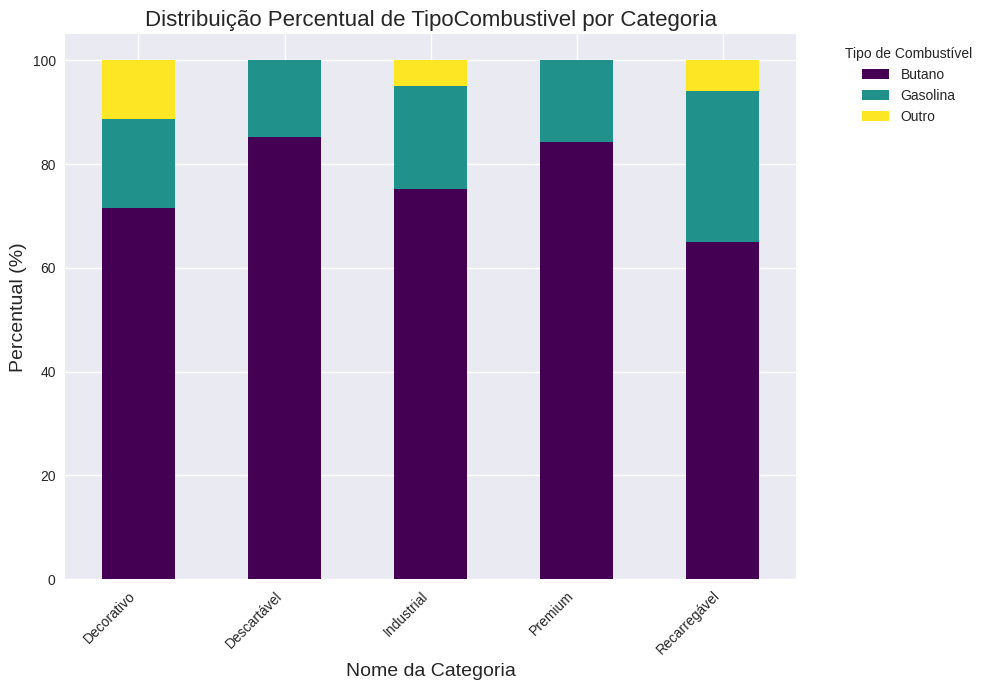

In [133]:
# Stacked Bar Chart for TipoCombustivel by NomeCategoria
# Using the cross_tab_combustivel DataFrame (percentage distribution)

cross_tab_combustivel.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')

plt.title('Distribuição Percentual de TipoCombustivel por Categoria', fontsize=16)
plt.xlabel('Nome da Categoria', fontsize=14)
plt.ylabel('Percentual (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Combustível', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#2.3: Análise de Utilização e Ciclo de Vida do Isqueiro


In [171]:
# Objetivo: Analisar como os isqueiros são utilizados e seu ciclo de vida.

# --- Data Loading (Included for self-contained execution) ---
# Define data directory
data_dir = '/content/drive/MyDrive/lightertrack'

# List of CSV files needed for this section
csv_files_usage_lifecycle = [
    'utilizacao.csv', 'isqueiros_usuario.csv', 'locais.csv', 'manutencao.csv'
]

# Dictionary to store DataFrames (using a local dfs for this section to avoid conflicts)
dfs_usage = {}

# Load each CSV file needed
for file in csv_files_usage_lifecycle:
    df_name = file.replace('.csv', '')
    # Check if the dataframe already exists in the main dfs to avoid redundant loading if other sections were run
    if df_name in dfs:
        dfs_usage[df_name] = dfs[df_name]
        print(f"{file} already loaded in main dfs. Using that.")
    else:
         dfs_usage[df_name] = pd.read_csv(data_dir + '/' + file)
         print(f"Loaded {file}")

# Identify and convert date/time columns to datetime type for relevant dataframes
date_columns_usage = {
    'utilizacao': ['DataHoraUso', 'DataCriacao'],
    'isqueiros_usuario': ['DataCompra', 'DataPrimeiroUso', 'DataUltimaLocalizacao', 'DataCriacao', 'DataAtualizacao'],
    'locais': ['DataCriacao'],
    'manutencao': ['DataManutencao', 'DataCriacao']
}

for df_name, cols in date_columns_usage.items():
    if df_name in dfs_usage: # Check if df exists
        for col in cols:
            if col in dfs_usage[df_name].columns: # Check if column exists
                dfs_usage[df_name][col] = pd.to_datetime(dfs_usage[df_name][col], errors='coerce') # Use errors='coerce' for robustness


# --- Original Analysis Code ---
# Merge para Utilização: isqueiros_usuario -> utilizacao <- locais
df_uso = dfs_usage['utilizacao'].merge(
    dfs_usage['isqueiros_usuario'][['IsqueiroUsuarioID', 'StatusAtual', 'CombustivelAtual']], on='IsqueiroUsuarioID'
).merge(
    dfs_usage['locais'][['LocalID', 'TipoLocal']], on='LocalID'
)

# Merge para Manutenção: isqueiros_usuario -> manutencao
df_manutencao = dfs_usage['manutencao'].merge(
    dfs_usage['isqueiros_usuario'][['IsqueiroUsuarioID', 'StatusAtual']], on='IsqueiroUsuarioID'
)

Loaded utilizacao.csv
Loaded isqueiros_usuario.csv
Loaded locais.csv
Loaded manutencao.csv


In [172]:
display(df_uso.head())


,UtilizacaoID,IsqueiroUsuarioID,LocalID,DataHoraUso,TipoUso,DuracaoUsoSegundos,ConsumoEstimadoML,Temperatura,UmidadeAr,Observacoes,Latitude,Longitude,DataCriacao,StatusAtual,CombustivelAtual,TipoLocal
0,1,46857,285,2023-11-06 20:27:43.734808,Cigarro,5,0.043,27.16,62.79,Dolor nisi labore modi. Unde in assumenda nost...,-23.467735,-46.504592,2025-07-23 15:59:26.790501,Em Uso,3.00,Outro
1,2,50861,274,2024-10-04 08:31:28.569672,Outro,2,0.040,23.51,47.80,Doloremque quasi ipsam odit saepe. Unde simili...,-23.605495,-46.510287,2025-07-23 15:59:26.790501,Perdido,43.27,Outro
2,3,49453,77,2025-06-21 19:38:46.091418,Cigarro,4,0.074,17.49,39.56,Dolore quidem deleniti vitae quaerat saepe dol...,-23.418648,-46.569174,2025-07-23 15:59:26.790501,Perdido,43.24,Bar
3,4,51402,478,2023-11-10 06:44:32.346659,Churrasco,7,0.040,29.19,87.45,Facilis exercitationem assumenda autem magni. ...,-23.431672,-46.545702,2025-07-23 15:59:26.790501,Em Uso,42.56,Trabalho
4,5,30378,962,2024-09-12 23:56:17.743521,Cigarro,7,0.056,27.64,80.01,Nemo ex doloribus distinctio ea excepturi aut....,-23.487334,-46.653925,2025-07-23 15:59:26.790501,Perdido,34.50,Restaurante


In [173]:
display(df_manutencao.head())

,ManutencaoID,IsqueiroUsuarioID,TipoManutencao,DataManutencao,Custo,EstabelecimentoID,Observacoes,DataCriacao,StatusAtual
0,1,14658,Troca Pedra,2024-08-05 22:48:40.662726,6.24,646,Earum voluptate debitis consequatur.,2025-07-23 15:59:32.571881,Em Uso
1,2,55430,Recarga,2025-07-22 06:35:24.259792,8.51,972,Nulla itaque repellendus iusto. Voluptas tempo...,2025-07-23 15:59:32.571881,Em Uso
2,3,42996,Recarga,2025-02-07 18:15:30.488759,12.79,244,Ex facilis ullam amet non nesciunt. Ad sapient...,2025-07-23 15:59:32.571881,Em Uso
3,4,35780,Limpeza,2023-10-14 17:27:47.575217,8.92,595,Iure at ipsum vitae. Modi quibusdam ex commodi.,2025-07-23 15:59:32.571881,Em Uso
4,5,3427,Limpeza,2024-07-05 19:34:13.857730,10.71,449,Molestiae quaerat doloribus recusandae fugiat....,2025-07-23 15:59:32.571881,Perdido


### Frequência de uso ao longo do tempo

### Horário de uso mais comum

### Tipos de locais mais utilizados

In [175]:
import plotly.express as px

# Calculate frequency of TipoLocal
tipo_local_counts = df_uso['TipoLocal'].value_counts().reset_index()
tipo_local_counts.columns = ['TipoLocal', 'Quantidade']

# Create interactive bar chart using Plotly Express
fig = px.bar(tipo_local_counts, x='TipoLocal', y='Quantidade',
             title='Tipos de Local Mais Frequentes em Registros de Uso (Plotly)',
             labels={'TipoLocal': 'Tipo de Local', 'Quantidade': 'Número de Registros de Uso'},
             color='TipoLocal', # Assign color by TipoLocal for visual distinction
             color_discrete_sequence=px.colors.qualitative.Vivid) # Use a different color sequence

fig.update_layout(xaxis_title='Tipo de Local',
                  yaxis_title='Número de Registros de Uso',
                  xaxis={'categoryorder': 'total descending'}, # Order bars by count
                  bargap=0.2)

fig.show()

### Status final dos isqueiros (em uso, perdido, quebrado)

In [177]:
import plotly.express as px

# Calculate frequency of StatusAtual
status_counts = dfs_usage['isqueiros_usuario']['StatusAtual'].value_counts().reset_index()
status_counts.columns = ['StatusAtual', 'Quantidade']

# Create interactive bar chart using Plotly Express
fig = px.bar(status_counts, x='StatusAtual', y='Quantidade',
             title='Distribuição do Status Atual dos Isqueiros (Plotly)',
             labels={'StatusAtual': 'Status Atual', 'Quantidade': 'Quantidade de Isqueiros'},
             color='StatusAtual', # Assign color by StatusAtual for visual distinction
             color_discrete_sequence=px.colors.qualitative.Set3) # Use a different color sequence

fig.update_layout(xaxis_title='Status Atual',
                  yaxis_title='Quantidade de Isqueiros',
                  xaxis={'categoryorder': 'total descending'}, # Order bars by count
                  bargap=0.2)

fig.show()

In [179]:
import plotly.express as px

# Calculate frequency of TipoUso
tipo_uso_counts = df_uso['TipoUso'].value_counts().reset_index()
tipo_uso_counts.columns = ['TipoUso', 'Quantidade']

# Create interactive bar chart using Plotly Express
fig = px.bar(tipo_uso_counts, x='TipoUso', y='Quantidade',
             title='Distribuição de TipoUso (Plotly)',
             labels={'TipoUso': 'Tipo de Uso', 'Quantidade': 'Quantidade'},
             color='TipoUso', # Assign color by TipoUso for visual distinction
             color_discrete_sequence=px.colors.qualitative.Plotly) # Use a different color sequence

fig.update_layout(xaxis_title='Tipo de Uso',
                  yaxis_title='Quantidade',
                  xaxis={'categoryorder': 'total descending'}, # Order bars by count
                  bargap=0.2)

fig.show()

In [180]:
import plotly.express as px

# Calculate frequency of TipoManutencao
tipo_manut_counts = df_manutencao['TipoManutencao'].value_counts().reset_index()
tipo_manut_counts.columns = ['TipoManutencao', 'Quantidade']

# Create interactive bar chart using Plotly Express
fig = px.bar(tipo_manut_counts, x='TipoManutencao', y='Quantidade',
             title='Distribuição de TipoManutencao (Plotly)',
             labels={'TipoManutencao': 'Tipo de Manutenção', 'Quantidade': 'Quantidade'},
             color='TipoManutencao', # Assign color by TipoManutencao for visual distinction
             color_discrete_sequence=px.colors.qualitative.Set1) # Use a different color sequence

fig.update_layout(xaxis_title='Tipo de Manutenção',
                  yaxis_title='Quantidade',
                  xaxis={'categoryorder': 'total descending'}, # Order bars by count
                  bargap=0.2)

fig.show()


### Tabela Cruzada: NomeCategoria x TipoCombustivel


TipoCombustivel,Butano,Gasolina,Outro
NomeCategoria,,,
Decorativo,71.485206,17.221040,11.293754
Descartável,85.237898,14.762102,0.000000
Industrial,75.089770,20.000000,4.910230
Premium,84.325537,15.674463,0.000000
Recarregável,64.935455,29.070349,5.994196


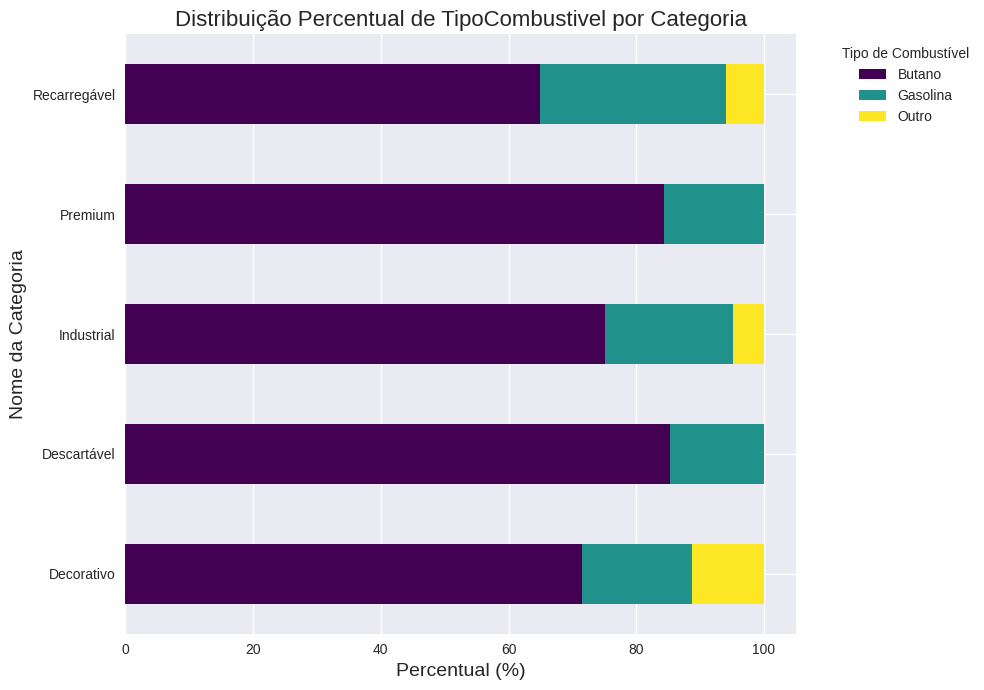

In [182]:
# Objetivo: Identificar os isqueiros mais vendidos e suas características.

# Calcular Quantidade Vendida
quant_vendida_marca = df_pop_isqueiros.groupby('NomeMarca')['Quantidade'].sum().reset_index().sort_values('Quantidade', ascending=False).head(10)
quant_vendida_categoria = df_pop_isqueiros.groupby('NomeCategoria')['Quantidade'].sum().reset_index().sort_values('Quantidade', ascending=False)

# Tabela Cruzada: Categoria x TipoCombustivel
print("\n### Tabela Cruzada: NomeCategoria x TipoCombustivel")
cross_tab_combustivel = pd.crosstab(df_pop_isqueiros['NomeCategoria'], df_pop_isqueiros['TipoCombustivel'], normalize='index') * 100
display(cross_tab_combustivel)

# Removed heatmap generation from this cell as it is already generated in another cell

# Stacked Horizontal Bar Chart for TipoCombustivel by NomeCategoria
# Using the cross_tab_combustivel DataFrame (percentage distribution)

cross_tab_combustivel.plot(kind='barh', stacked=True, figsize=(10, 7), colormap='viridis') # Changed kind to 'barh' for horizontal

plt.title('Distribuição Percentual de TipoCombustivel por Categoria', fontsize=16)
plt.xlabel('Percentual (%)', fontsize=14) # Swapped labels for horizontal
plt.ylabel('Nome da Categoria', fontsize=14) # Swapped labels for horizontal
plt.legend(title='Tipo de Combustível', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#2.4: Análise de Dados Geográficos

In [166]:
# Objetivo: Explorar a distribuição espacial de usuários, estabelecimentos e utilizações.

# --- Data Loading (Included for self-contained execution) ---
# Define data directory
data_dir = '/content/drive/MyDrive/lightertrack'

# List of CSV files needed for this section
csv_files_geo = [
    'estabelecimentos.csv', 'cidades.csv', 'estados.csv', 'locais.csv'
]

# Dictionary to store DataFrames (using a local dfs for this section to avoid conflicts)
dfs_geo = {}

# Load each CSV file needed
for file in csv_files_geo:
    df_name = file.replace('.csv', '')
    # Check if the dataframe already exists in the main dfs to avoid redundant loading if other sections were run
    if df_name in dfs:
        dfs_geo[df_name] = dfs[df_name]
        print(f"{file} already loaded in main dfs. Using that.")
    else:
         dfs_geo[df_name] = pd.read_csv(data_dir + '/' + file)
         print(f"Loaded {file}")

# Identify and convert date/time columns to datetime type for relevant dataframes
date_columns_geo = {
    'estabelecimentos': ['DataAbertura', 'DataCriacao'],
    'cidades': ['DataCriacao'],
    'estados': ['DataCriacao', 'DataAtualizacao'],
    'locais': ['DataCriacao']
}

for df_name, cols in date_columns_geo.items():
    if df_name in dfs_geo: # Check if df exists
        for col in cols:
            if col in dfs_geo[df_name].columns: # Check if column exists
                dfs_geo[df_name][col] = pd.to_datetime(dfs_geo[df_name][col], errors='coerce') # Use errors='coerce' for robustness


# --- Original Analysis Code ---
# Estabelecimentos por Localização
df_estab_geo = dfs_geo['estabelecimentos'].merge(
    dfs_geo['cidades'][['CidadeID', 'EstadoID']], on='CidadeID'
).merge(
    dfs_geo['estados'][['EstadoID', 'NomeEstado', 'Regiao']], on='EstadoID'
)

# Utilização por Localização
# Need to ensure df_uso is available or recreate it if necessary.
# Assuming df_uso was created in the previous section and is available.
# If not, we would need to add code to recreate df_uso here.
# For robustness, let's include the necessary merge for df_uso as well,
# using dfs_usage if it exists, or loading the files again if needed.

# Re-creating df_uso for this section's scope if dfs_usage is not available
if 'df_uso' not in locals() and 'dfs_usage' not in locals():
     # Load necessary usage files if dfs_usage was not created
    csv_files_usage_recreate = ['utilizacao.csv', 'isqueiros_usuario.csv', 'locais.csv']
    dfs_usage_recreate = {}
    for file in csv_files_usage_recreate:
        df_name = file.replace('.csv', '')
        if df_name in dfs:
            dfs_usage_recreate[df_name] = dfs[df_name]
        else:
             dfs_usage_recreate[df_name] = pd.read_csv(data_dir + '/' + file)

    date_columns_usage_recreate = {
        'utilizacao': ['DataHoraUso', 'DataCriacao'],
        'isqueiros_usuario': ['DataCompra', 'DataPrimeiroUso', 'DataUltimaLocalizacao', 'DataCriacao', 'DataAtualizacao'],
        'locais': ['DataCriacao']
    }
    for df_name, cols in date_columns_usage_recreate.items():
        if df_name in dfs_usage_recreate:
            for col in cols:
                 if col in dfs_usage_recreate[df_name].columns:
                    dfs_usage_recreate[df_name][col] = pd.to_datetime(dfs_usage_recreate[df_name][col], errors='coerce')

    df_uso = dfs_usage_recreate['utilizacao'].merge(
        dfs_usage_recreate['isqueiros_usuario'][['IsqueiroUsuarioID', 'StatusAtual', 'CombustivelAtual']], on='IsqueiroUsuarioID'
    ).merge(
        dfs_usage_recreate['locais'][['LocalID', 'TipoLocal', 'Latitude', 'Longitude']], on='LocalID' # Include Lat/Lon from locais
    )
    print("df_uso recreated for geographical analysis.")
elif 'df_uso' in locals():
     print("Using existing df_uso.")
     # Ensure Latitude and Longitude are in df_uso by merging with locais if not already present
     if 'Latitude' not in df_uso.columns or 'Longitude' not in df_uso.columns:
          if 'locais' in dfs_usage:
               df_uso = df_uso.merge(dfs_usage['locais'][['LocalID', 'Latitude', 'Longitude']], on='LocalID', how='left')
               print("Added Latitude and Longitude to existing df_uso.")
          elif 'locais' in dfs_geo: # Check dfs_geo if dfs_usage not available
               df_uso = df_uso.merge(dfs_geo['locais'][['LocalID', 'Latitude', 'Longitude']], on='LocalID', how='left')
               print("Added Latitude and Longitude to existing df_uso using dfs_geo.")
          else:
               print("Warning: 'locais' dataframe not found to add Latitude/Longitude to df_uso.")

elif 'dfs_usage' in locals():
    # If dfs_usage exists, recreate df_uso using it and include Latitude/Longitude from locais
    if 'utilizacao' in dfs_usage and 'isqueiros_usuario' in dfs_usage and 'locais' in dfs_usage:
         df_uso = dfs_usage['utilizacao'].merge(
            dfs_usage['isqueiros_usuario'][['IsqueiroUsuarioID', 'StatusAtual', 'CombustivelAtual']], on='IsqueiroUsuarioID'
        ).merge(
            dfs_usage['locais'][['LocalID', 'TipoLocal', 'Latitude', 'Longitude']], on='LocalID' # Include Lat/Lon from locais
        )
         print("df_uso recreated from dfs_usage for geographical analysis.")
    else:
         print("Warning: Necessary dataframes not found in dfs_usage to recreate df_uso.")
else:
    print("Warning: Could not determine how to get df_uso for geographical analysis.")


# Now df_uso should contain Latitude and Longitude
df_uso_geo = df_uso.copy() # Create a copy for geo analysis if needed


print("DataFrames df_estab_geo and df_uso_geo created for Geographical analysis.")


Loaded estabelecimentos.csv
Loaded cidades.csv
Loaded estados.csv
Loaded locais.csv
Using existing df_uso.
DataFrames df_estab_geo and df_uso_geo created for Geographical analysis.


In [167]:
display(df_estab_geo.head())


,EstabelecimentoID,TipoEstabelecimentoID,CidadeID,NomeEstabelecimento,Endereco,CEP,Latitude,Longitude,Telefone,HorarioFuncionamento,DataAbertura,DataCriacao,Ativo,EstadoID,NomeEstado,Regiao
0,1,6,333,Garcia - EI,"Vereda de Rocha, 686\nConjunto Novo Dom Bosco\...",46873-669,-23.451881,-46.783956,+55 71 6517-7232,08:00-22:00,2019-04-27,2025-07-23 15:58:29.039637,1,20,Mato Grosso do Sul,Centro-Oeste
1,2,2,148,Macedo Ltda.,"Avenida Vitória da Cunha, 80\nCustodinha\n8629...",36209-421,-23.687573,-46.784743,(051) 0435-7677,08:00-22:00,2017-10-21,2025-07-23 15:58:29.039637,1,3,Minas Gerais,Sudeste
2,3,5,453,Pereira Lopes S.A.,"Núcleo Marcelo Correia, 34\nConjunto Taquaril\...",32833323,-23.493310,-46.599422,+55 (051) 8145 6297,08:00-22:00,2021-11-04,2025-07-23 15:58:29.039637,1,19,Distrito Federal,Centro-Oeste
3,4,1,83,Aragão Dias S.A.,"Largo Gabriel Pereira, 924\nErmelinda\n3329756...",25991337,-23.455655,-46.744129,+55 (061) 4495-1218,08:00-22:00,2022-09-19,2025-07-23 15:58:29.039637,1,12,Goiás,Centro-Oeste
4,5,7,149,Lopes,"Parque Sampaio, 56\nVila Mangueiras\n97999-540...",35465-320,-23.660783,-46.522936,+55 41 7928 6547,08:00-22:00,2022-04-26,2025-07-23 15:58:29.039637,1,5,Bahia,Nordeste


In [168]:
display(df_uso_geo.head())

,UtilizacaoID,IsqueiroUsuarioID,LocalID,DataHoraUso,TipoUso,DuracaoUsoSegundos,ConsumoEstimadoML,Temperatura,UmidadeAr,Observacoes,Latitude,Longitude,DataCriacao,StatusAtual,CombustivelAtual,TipoLocal,HoraUso,StatusAtual_Ordinal
0,1,46857,285,2023-11-06 20:27:43.734808,Cigarro,5,0.043,27.16,62.79,Dolor nisi labore modi. Unde in assumenda nost...,-23.467735,-46.504592,2025-07-23 15:59:26.790501,Em Uso,3.00,Outro,20,Em Uso
1,2,50861,274,2024-10-04 08:31:28.569672,Outro,2,0.040,23.51,47.80,Doloremque quasi ipsam odit saepe. Unde simili...,-23.605495,-46.510287,2025-07-23 15:59:26.790501,Perdido,43.27,Outro,8,Perdido
2,3,49453,77,2025-06-21 19:38:46.091418,Cigarro,4,0.074,17.49,39.56,Dolore quidem deleniti vitae quaerat saepe dol...,-23.418648,-46.569174,2025-07-23 15:59:26.790501,Perdido,43.24,Bar,19,Perdido
3,4,51402,478,2023-11-10 06:44:32.346659,Churrasco,7,0.040,29.19,87.45,Facilis exercitationem assumenda autem magni. ...,-23.431672,-46.545702,2025-07-23 15:59:26.790501,Em Uso,42.56,Trabalho,6,Em Uso
4,5,30378,962,2024-09-12 23:56:17.743521,Cigarro,7,0.056,27.64,80.01,Nemo ex doloribus distinctio ea excepturi aut....,-23.487334,-46.653925,2025-07-23 15:59:26.790501,Perdido,34.50,Restaurante,23,Perdido


### Distribuição de Usuários por Região




In [159]:
import plotly.express as px

# Contagem de usuários por região
df_regiao = df_perfil['Regiao'].value_counts().reset_index()
df_regiao.columns = ['Regiao', 'Contagem']

# Gráfico com Plotly
fig = px.bar(
    df_regiao,
    x='Regiao',
    y='Contagem',
    title='Distribuição de Usuários por Região',
    text='Contagem'
)

fig.update_layout(
    xaxis_title='Região',
    yaxis_title='Número de Usuários',
    xaxis_tickangle=-45,
    height=600
)

fig.show()


### Top 10 Estados por Número de Estabelecimentos

In [161]:
import plotly.express as px

# Preparar dados
df_top_estados = estado_estab_freq.reset_index()
df_top_estados.columns = ['Estado', 'Quantidade']

# Criar gráfico interativo
fig = px.bar(
    df_top_estados,
    x='Estado',
    y='Quantidade',
    title='Top 10 Estados por Número de Estabelecimentos',
    text='Quantidade',
    color='Estado',
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig.update_layout(
    xaxis_title='Estado',
    yaxis_title='Quantidade de Estabelecimentos',
    xaxis_tickangle=-45,
    bargap=0.3,
    height=600
)

fig.show()


#Projeto desenvolvido por Murilo Souza, Cientista de Dados em Transição.
Este notebook é um projeto experimental e os dados aqui representados são fictícios e não reprensetam nenhuma empresa/instituição.

Todos os direitos reservados a Murilo Souza Izaias.